In [142]:
import pandas as pd
from pandas.core.computation.expr import intersection
from shapely.geometry import Polygon
from shapely.wkt import loads
import xlwings as xw

from src.validation import SearchAmbiguity

In [236]:
selected_cells = xw.apps.active.selection
selected_cells.value


6.0

In [278]:
print(xw.sheets.active.range('A1').value)

None


In [17]:
selected_cells = xw.apps.active.selection
wkt = selected_cells.value
polygon: Polygon = loads(wkt)

In [319]:
sheet_result = 'Зона 1'

In [320]:
sheet_autocad = xw.sheets['Автокад']
autocad_df = sheet_autocad.range('A1').expand().options(pd.DataFrame, header=1, index=False).value
autocad_df['number_position'] = autocad_df['number_position'].apply(lambda x: loads(x))
autocad_df['geometry'] = autocad_df['geometry'].apply(lambda x: loads(x))

autocad_df

,index,origin_number,number_position,split_number,type,geometry,size
0,0,3,POINT (3108.838205298518 1707.285109871409),3,Point,POINT (3108.838205298518 1707.285109871409),NaN
1,1,4,POINT (3114.150988844972 1707.4695572873902),4,Point,POINT (3114.150988844972 1707.4695572873902),NaN
2,2,5,POINT (3115.690642463274 1707.5867820573599),5,Point,POINT (3115.690642463274 1707.5867820573599),NaN
3,3,6,POINT (3115.1004453425708 1706.18062074892),6,Point,POINT (3115.1004453425708 1706.18062074892),NaN
4,4,7,POINT (3114.699609216242 1705.0905155704238),7,Point,POINT (3114.699609216242 1705.0905155704238),NaN
5,5,10,POINT (3104.043722283615 1698.543651078497),10,Point,POINT (3104.043722283615 1698.543651078497),NaN
6,6,11,POINT (3105.090899215862 1695.9481208535972),11,Point,POINT (3105.090899215862 1695.9481208535972),NaN
7,7,12,POINT (3106.332887793542 1693.7013226121771),12,Point,POINT (3106.332887793542 1693.7013226121771),NaN
8,8,14,POINT (3104.361115387819 1692.888423763281),14,Point,POINT (3104.361115387819 1692.888423763281),NaN
9,9,13,POINT (3107.4888707400646 1689.420932022136),13,Point,POINT (3107.4888707400646 1689.420932022136),NaN


In [321]:
sheet_zones = xw.sheets['Зоны']
zones_df = sheet_zones.range('A1').expand().options(pd.DataFrame, header=1, index=False).value

zones_df

,index,name,geometry
0,0,Зона 1,"POLYGON ((3119.998163227592 1712.652575184729,..."
1,1,Зона 2,MULTIPOLYGON (((3117.421038375149 1688.1591344...
2,2,Зона 3,MULTIPOLYGON (((3107.360738445024 1711.4623614...


In [322]:
zone_names = zones_df.name.tolist()
zone_names.remove(sheet_result)

zone_names

['Зона 2', 'Зона 3']

In [323]:
from win32com.universal import com_error

used_split_numbers_df = pd.DataFrame(columns=['split_number', 'type'])
for zone_name in zone_names:
    try:
        sheet_zone = xw.sheets[zone_name]
    except com_error:
        continue
    if sheet_zone.range('A1').value is None:
        continue
    _used_split_numbers_df = sheet_zone.range('A1').expand().options(pd.DataFrame, header=1, index=False).value[['split_number', 'type']]
    used_split_numbers_df = pd.concat([used_split_numbers_df, _used_split_numbers_df])
used_split_numbers = used_split_numbers_df[used_split_numbers_df['type'] == 'Point']['split_number'].tolist()

used_split_numbers

[]

In [324]:
autocad_df_not_used = autocad_df[~autocad_df['split_number'].isin(used_split_numbers)]

autocad_df_not_used

,index,origin_number,number_position,split_number,type,geometry,size
0,0,3,POINT (3108.838205298518 1707.285109871409),3,Point,POINT (3108.838205298518 1707.285109871409),NaN
1,1,4,POINT (3114.150988844972 1707.4695572873902),4,Point,POINT (3114.150988844972 1707.4695572873902),NaN
2,2,5,POINT (3115.690642463274 1707.5867820573599),5,Point,POINT (3115.690642463274 1707.5867820573599),NaN
3,3,6,POINT (3115.1004453425708 1706.18062074892),6,Point,POINT (3115.1004453425708 1706.18062074892),NaN
4,4,7,POINT (3114.699609216242 1705.0905155704238),7,Point,POINT (3114.699609216242 1705.0905155704238),NaN
5,5,10,POINT (3104.043722283615 1698.543651078497),10,Point,POINT (3104.043722283615 1698.543651078497),NaN
6,6,11,POINT (3105.090899215862 1695.9481208535972),11,Point,POINT (3105.090899215862 1695.9481208535972),NaN
7,7,12,POINT (3106.332887793542 1693.7013226121771),12,Point,POINT (3106.332887793542 1693.7013226121771),NaN
8,8,14,POINT (3104.361115387819 1692.888423763281),14,Point,POINT (3104.361115387819 1692.888423763281),NaN
9,9,13,POINT (3107.4888707400646 1689.420932022136),13,Point,POINT (3107.4888707400646 1689.420932022136),NaN


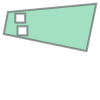

In [325]:
zone_shape = loads(zones_df[zones_df['name'] == sheet_result]['geometry'].tolist()[0])

zone_shape

In [326]:
intersections_shapes = []
for _, series in autocad_df_not_used.iterrows():
    geometry = series['geometry']
    geometry_type = series['type']
    intersection = zone_shape.intersection(geometry)
    if geometry_type == 'Polygon' or geometry_type == 'MultiPolygon':
        size = intersection.area
    elif geometry_type == 'LineString' or geometry_type == 'MultiLineString':
        size = intersection.length
    else:
        size = None
    if intersection:
        intersections_shapes.append({
            'split_number': series['split_number'],
            'type': geometry_type,
            'geometry': intersection,
            'size': size
        })
intersections_shapes_df = pd.DataFrame(intersections_shapes)

intersections_shapes_df

,split_number,type,geometry,size
0,3,Point,POINT (3108.838205298518 1707.285109871409),NaN
1,4,Point,POINT (3114.150988844972 1707.4695572873902),NaN
2,5,Point,POINT (3115.690642463274 1707.5867820573599),NaN
3,6,Point,POINT (3115.1004453425708 1706.18062074892),NaN
4,7,Point,POINT (3114.699609216242 1705.0905155704238),NaN
5,19а,Point,POINT (3115.8767179014208 1710.2258575299381),NaN
6,19б,Point,POINT (3115.8767179014208 1710.2258575299381),NaN
7,19в,Point,POINT (3115.8767179014208 1710.2258575299381),NaN
8,19г,Point,POINT (3115.8767179014208 1710.2258575299381),NaN
9,24,Point,POINT (3105.0233167174188 1709.065127000339),NaN


In [327]:
sheet = xw.sheets[sheet_result]
for l in ['A', 'B']:
    sheet[f'{l}:{l}'].number_format = '@'
sheet.range('A1').value = intersections_shapes_df
sheet["A1"].value = ['index']

In [328]:
xw.sheets.active.name

'Зона 1'